Download Dataset

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fake-news-detection-datasets


Load Dataset

In [ ]:
df_fake = pd.read_csv(path + "/News _dataset/Fake.csv")
df_true = pd.read_csv(path + "/News _dataset/True.csv")

Data Analysis

In [ ]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
df_fake.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
df_true.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
df_fake["subject"].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<ipython-input-8-dd377da22a3d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="subject", data=df_fake, palette="Set2")


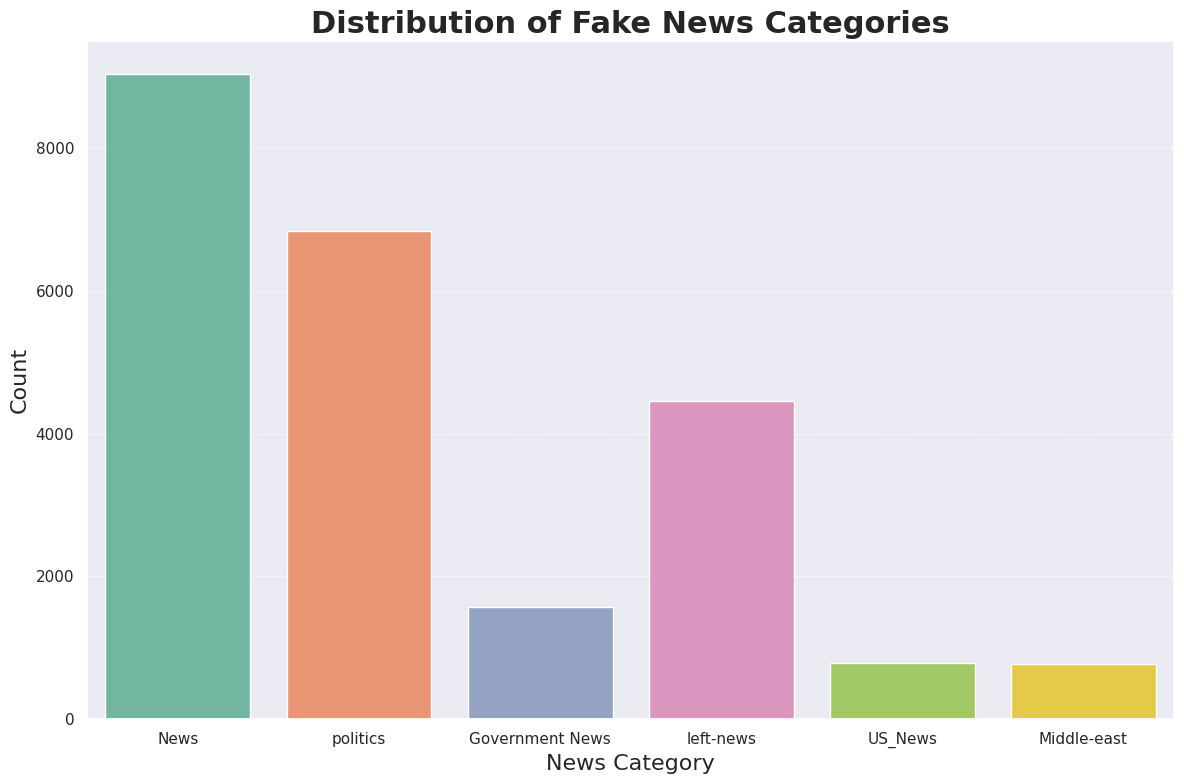

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="pastel")
plt.figure(figsize=(12, 8))
sns.countplot(x="subject", data=df_fake, palette="Set2")
plt.title("Distribution of Fake News Categories", fontsize=22, weight='bold')
plt.xlabel("News Category", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df_true["subject"].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


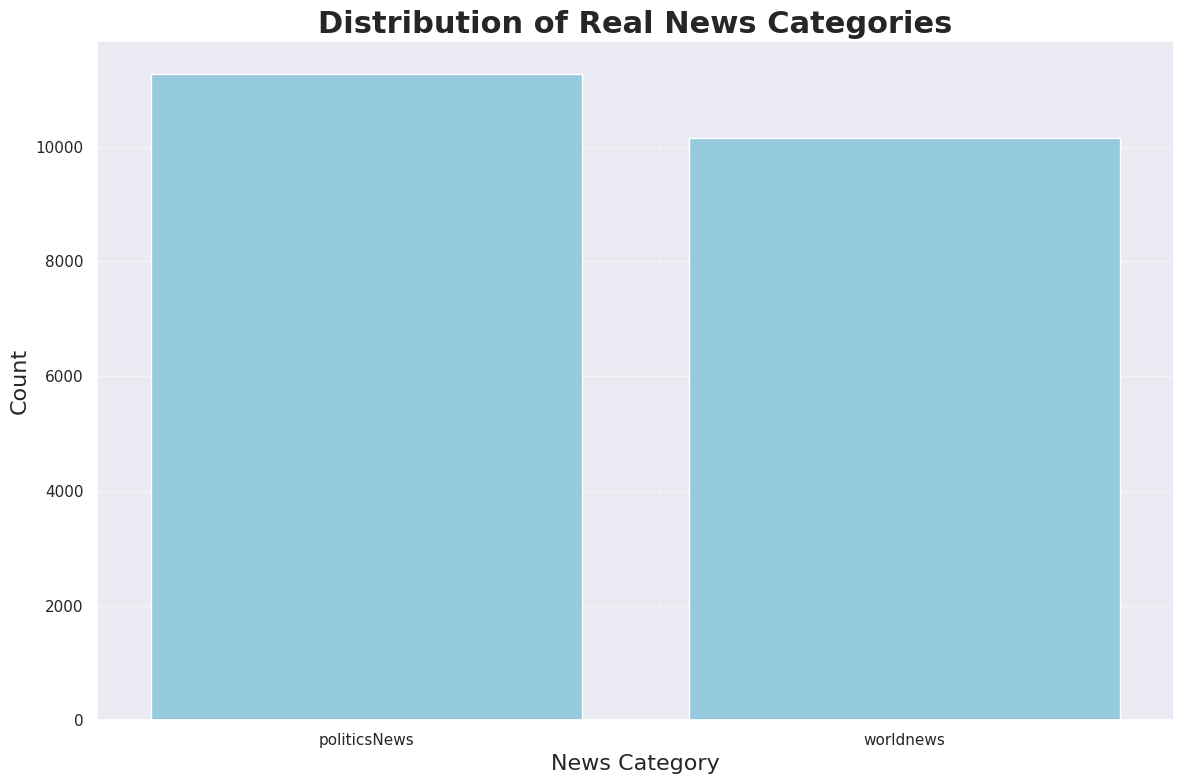

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="pastel")
plt.figure(figsize=(12,8))
sns.countplot(x="subject", data=df_true, color='skyblue')
plt.title("Distribution of Real News Categories", fontsize=22, weight='bold')
plt.xlabel("News Category", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Preprocessing


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Download NLTK stopwords (cukup sekali saja)
nltk.download('punkt_tab')
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Fungsi preprocessing: lowercasing, tokenisasi, filtering, dan trigram
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    trigrams = list(nltk.trigrams(tokens))
    return ' '.join([' '.join(trigram) for trigram in trigrams])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
fake_text_raw = df_fake["text"].dropna().tolist()
fake_text_processed = " ".join([preprocess_text(text) for text in fake_text_raw])

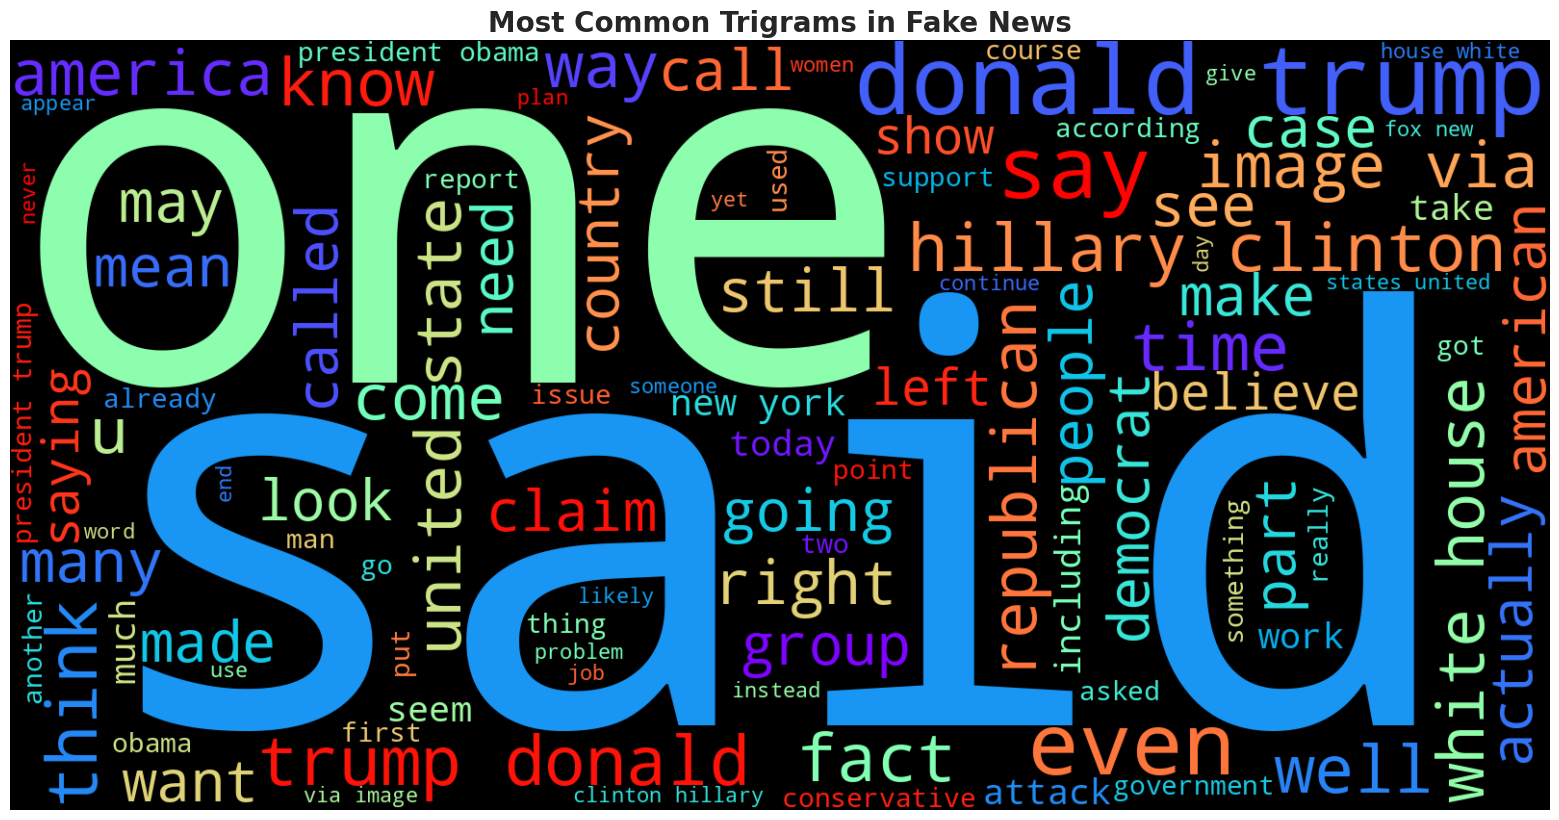

In [ ]:
stopwords_wc = set(STOPWORDS)
plt.figure(figsize=(16, 8))
wordcloud_fake = WordCloud(
    width=1600,
    height=800,
    background_color='black',
    colormap='rainbow',
    max_words=100,
    stopwords=stopwords_wc,
    contour_color='white',
    contour_width=1
).generate(fake_text_processed)

plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Trigrams in Fake News", fontsize=20, weight='bold')
plt.tight_layout(pad=0)
plt.show()

Wordcloud fake text data

In [ ]:
true_text_raw = df_true["text"].dropna().tolist()
true_text_processed = " ".join([preprocess_text(text) for text in true_text_raw])


Wordcloud Real / True text data

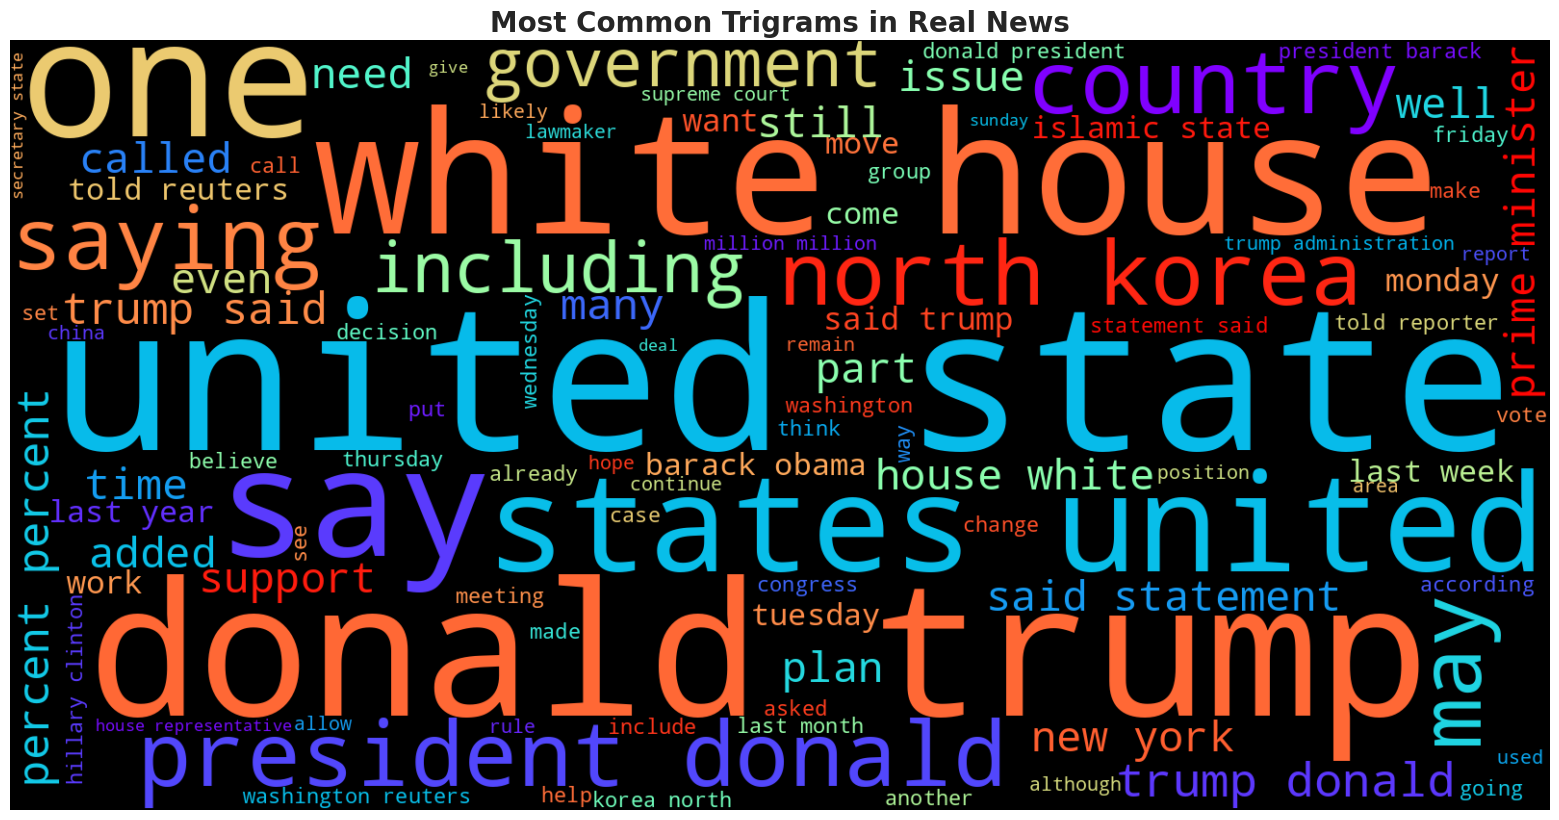

In [ ]:
plt.figure(figsize=(16, 8))
wordcloud_true = WordCloud(
    width=1600,
    height=800,
    background_color='black',
    colormap='rainbow',
    max_words=100,
    stopwords=stopwords_wc,
    contour_color='white',
    contour_width=1
).generate(true_text_processed)

plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Trigrams in Real News", fontsize=20, weight='bold')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df_fake["label"]="fake"
df_true["label"]="real"

In [ ]:
df_final= pd.concat([df_fake,df_true])

In [ ]:
df_final = df_final.sample(frac=1).reset_index(drop=True)

In [ ]:
df_final.head(10)

,title,text,subject,date,label
0,Myanmar military appoints general to probe mas...,YANGON (Reuters) - Myanmar s army said on Wedn...,worldnews,"December 20, 2017",real
1,Why Did Friends And Family Protect Muslim Bonn...,While some of the most important questions abo...,politics,"Dec 11, 2015",fake
2,Clinton seeks to keep Trump on defensive after...,"RALEIGH, N.C. (Reuters) - Democrat Hillary Cli...",politicsNews,"September 26, 2016",real
3,Turkish family of PakTurk Schools director abd...,ISLAMABAD (Reuters) - The family of a former d...,worldnews,"September 28, 2017",real
4,LEAKED DOCUMENTS: GEORGE SOROS GAVE 600K To Pr...,Leaked documents from left-wing financier Geo...,left-news,"Sep 4, 2016",fake
5,Patrick Henningsen and Don DeBar Discuss Trump...,Sputnik Radio s new program Trend Storm is hos...,Middle-east,"February 8, 2017",fake
6,HAWAIIAN RESTAURANT Gets Hammered With Negativ...,Honolulu s Caf 8 gets rave reviews on Yelp...,left-news,"Dec 27, 2016",fake
7,Joy Behar Drops DEPRESSING Truthbomb About Wh...,While most of us are still in a state of shock...,News,"November 9, 2016",fake
8,MOCKINGBIRD REDUX? CNN’s Role in Peddling Fake...,21st Century Wire says CNN has reportedly refu...,US_News,"June 29, 2017",fake
9,Bulgaria parliament passes anti-corruption law...,SOFIA (Reuters) - Bulgaria s parliament passed...,worldnews,"December 20, 2017",real


In [ ]:
df_final.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
df_final.drop(["subject","date"], axis=1)

,title,text,label
0,Myanmar military appoints general to probe mas...,YANGON (Reuters) - Myanmar s army said on Wedn...,real
1,Why Did Friends And Family Protect Muslim Bonn...,While some of the most important questions abo...,fake
2,Clinton seeks to keep Trump on defensive after...,"RALEIGH, N.C. (Reuters) - Democrat Hillary Cli...",real
3,Turkish family of PakTurk Schools director abd...,ISLAMABAD (Reuters) - The family of a former d...,real
4,LEAKED DOCUMENTS: GEORGE SOROS GAVE 600K To Pr...,Leaked documents from left-wing financier Geo...,fake
...,...,...,...
44893,BREAKING: Wikileaks Releases ‘Vault 7’ Part 1 ...,21st Century Wire says WikiLeaks has released ...,fake
44894,New Book Reveals HILLARY’S ANTI-SEMITIC SIDE: ...,"Hillary doesn t recall saying it, but Bill s c...",fake
44895,ENERGY CO PRESIDENT: “There are no political h...,,fake
44896,Foreign minister warns UK cannot become 'vassa...,EDINBURGH (Reuters) - Britain must strike a st...,real


In [ ]:
df_final.head()

,title,text,subject,date,label
0,Myanmar military appoints general to probe mas...,YANGON (Reuters) - Myanmar s army said on Wedn...,worldnews,"December 20, 2017",real
1,Why Did Friends And Family Protect Muslim Bonn...,While some of the most important questions abo...,politics,"Dec 11, 2015",fake
2,Clinton seeks to keep Trump on defensive after...,"RALEIGH, N.C. (Reuters) - Democrat Hillary Cli...",politicsNews,"September 26, 2016",real
3,Turkish family of PakTurk Schools director abd...,ISLAMABAD (Reuters) - The family of a former d...,worldnews,"September 28, 2017",real
4,LEAKED DOCUMENTS: GEORGE SOROS GAVE 600K To Pr...,Leaked documents from left-wing financier Geo...,left-news,"Sep 4, 2016",fake


In [ ]:
df_final.label.value_counts()

,count
label,
fake,23481
real,21417


<Axes: xlabel='label', ylabel='count'>

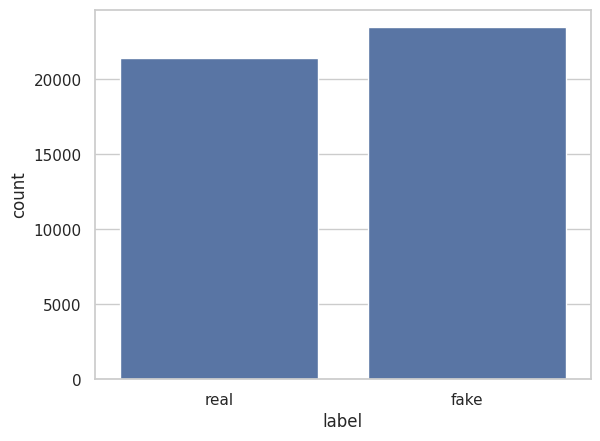

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df_final["label"])

In [ ]:
df_final.head(5)

,title,text,subject,date,label
0,Myanmar military appoints general to probe mas...,YANGON (Reuters) - Myanmar s army said on Wedn...,worldnews,"December 20, 2017",real
1,Why Did Friends And Family Protect Muslim Bonn...,While some of the most important questions abo...,politics,"Dec 11, 2015",fake
2,Clinton seeks to keep Trump on defensive after...,"RALEIGH, N.C. (Reuters) - Democrat Hillary Cli...",politicsNews,"September 26, 2016",real
3,Turkish family of PakTurk Schools director abd...,ISLAMABAD (Reuters) - The family of a former d...,worldnews,"September 28, 2017",real
4,LEAKED DOCUMENTS: GEORGE SOROS GAVE 600K To Pr...,Leaked documents from left-wing financier Geo...,left-news,"Sep 4, 2016",fake


In [ ]:
df_final["text"]=df_final["title"]+df_final["text"]

In [ ]:
df_final=df_final[["text","label"]]

In [ ]:
df_final['label'] = df_final['label'].map({'real':1, 'fake':0})

<ipython-input-28-8c3e4f11feeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['label'] = df_final['label'].map({'real':1, 'fake':0})


In [ ]:
df_final.sample(5)

,text,label
27858,WOW! STATE DEPARTMENT Lies Again About The Big...,0
61,Egypt's Sisi says spoke to Donald Trump by tel...,1
19069,Phoenix mayor calls on Trump to postpone rally...,1
16801,"Eyeing national vote, Berlusconi celebrates wi...",1
9784,Kremlin says in touch with France over possibl...,1


In [ ]:
max_len=100
data_text=df_final["text"]
data_label=df_final["label"]

In [ ]:
from transformers import BertTokenizer, TFBertModel, AutoTokenizer

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [ ]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [ ]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)
maxlen=100

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer, BatchNormalization
from tensorflow.keras.models import Model

class BertLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = bert_model

    def call(self, inputs):
        # Mengambil pooled_output dari BERT model (posisi [1])
        return self.bert(inputs)[1]

def create_model(bert_model, maxlen=100):
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name="attention_mask")

    bert_layer = BertLayer(bert_model)
    pooled_output = bert_layer({'input_ids': input_ids, 'attention_mask': attention_mask})

    x = Dropout(0.3)(pooled_output)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)  # output binary classification

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model


In [ ]:
# Create the model
model = create_model(bert_model)

In [ ]:
# Display the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ attention_mask      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ids           │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ attention_mask[0… │
│ (BertLayer)         │                   │            │ input_ids[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 768)       │          0 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 107,521 (420.00 KB)

 Trainable params: 107,137 (418.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(
    learning_rate=2e-5,
    epsilon=1e-08,
    clipnorm=1.0
)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',      # Pantau kerugian validasi
    patience=4,              # Tunggu 4 epoch tanpa perbaikan sebelum stop
    verbose=1,               # Tampilkan info saat stop
    restore_best_weights=True, # Kembalikan bobot terbaik saat training berhenti
    min_delta=1e-4           # Perbaikan minimal yang dianggap signifikan (untuk menghindari stop terlalu cepat)
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',      # Pantau kerugian validasi
    factor=0.5,              # Turunkan LR 50% saat stagnan
    patience=2,              # Tunggu 2 epoch tanpa perbaikan sebelum turunkan LR
    verbose=1,
    min_lr=1e-7,             # Minimal LR sangat kecil untuk training jangka panjang
    cooldown=1,              # Setelah turunkan LR, beri waktu 1 epoch untuk adaptasi sebelum cek lagi
    min_delta=1e-4           # Perbaikan minimal dianggap signifikan untuk reset penghitungan patience
)

In [ ]:
history = model.fit(
    x={
        'input_ids': X_train_token['input_ids'],
        'attention_mask': X_train_token['attention_mask']
    },
    y=Y_train,
    epochs=20,
    batch_size=32,               # Batch size umum, coba sesuaikan dengan memori
    validation_data=(
        {
            'input_ids': X_test_token['input_ids'],
            'attention_mask': X_test_token['attention_mask']
        },
        Y_test
    ),
    shuffle=True,                # Acak data setiap epoch untuk training lebih baik
    callbacks=[early_stopping, reduce_lr],
    verbose=1                   # Informasi training ditampilkan
)


Epoch 1/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 307s 255ms/step - accuracy: 0.5344 - loss: 0.9102 - val_accuracy: 0.8146 - val_loss: 0.4760 - learning_rate: 2.0000e-05
Epoch 2/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 299s 242ms/step - accuracy: 0.6898 - loss: 0.6187 - val_accuracy: 0.8660 - val_loss: 0.3388 - learning_rate: 2.0000e-05
Epoch 3/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 322s 242ms/step - accuracy: 0.7798 - loss: 0.4705 - val_accuracy: 0.8976 - val_loss: 0.2646 - learning_rate: 2.0000e-05
Epoch 4/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 322s 242ms/step - accuracy: 0.8186 - loss: 0.4105 - val_accuracy: 0.9084 - val_loss: 0.2330 - learning_rate: 2.0000e-05
Epoch 5/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 300s 267ms/step - accuracy: 0.8372 - loss: 0.3746 - val_accuracy: 0.9193 - val_loss: 0.2066 - learning_rate: 2.0000e-05
Epoch 6/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 322s 268ms/step - accuracy: 0.8605 - loss: 0.3324 - val_accuracy: 0.9296 - val_loss: 0.1834 - learning_rate: 2.0000e-05
Epoch 7/20
1123/1123 ━━━━━━━

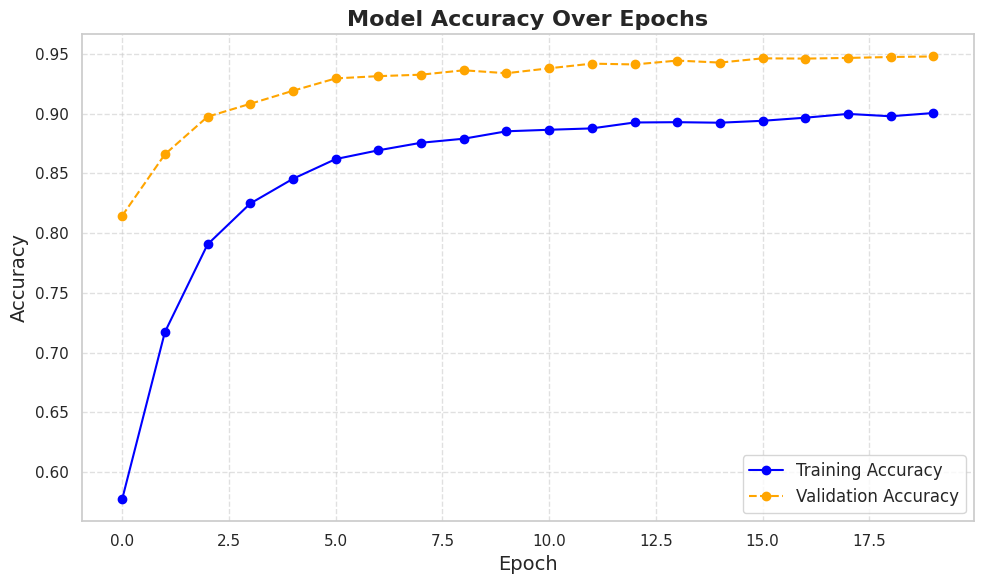

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', linestyle='--', color='orange', label='Validation Accuracy')

plt.title('Model Accuracy Over Epochs', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

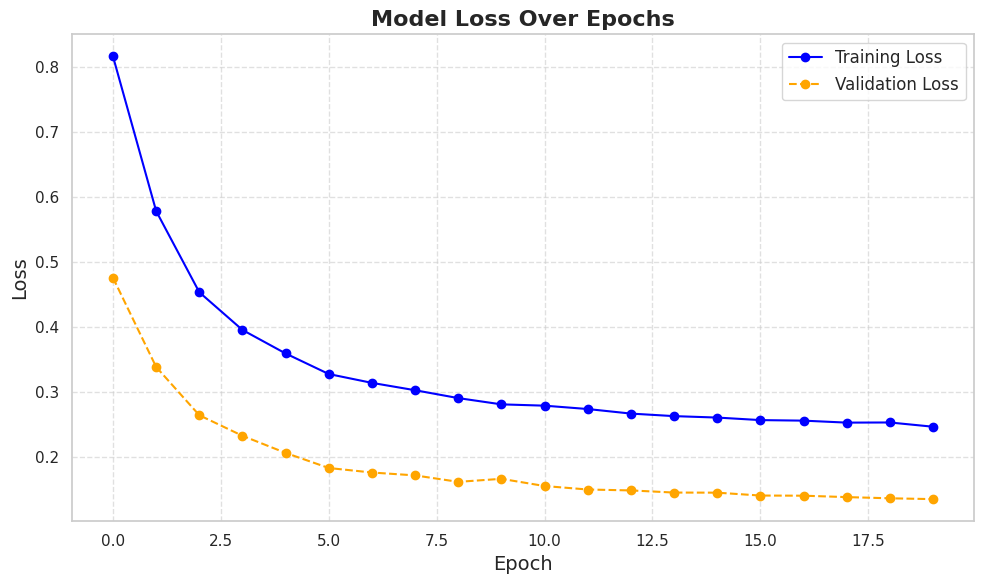

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], marker='o', linestyle='-', color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', linestyle='--', color='orange', label='Validation Loss')

plt.title('Model Loss Over Epochs', fontsize=16, fontweight='bold')
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Prediksi probabilitas kelas positif pada data testing
y_pred_proba = model.predict({
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
})

# Konversi probabilitas ke label biner (0 atau 1) menggunakan threshold 0.5
y_pred = (y_pred_proba >= 0.5).astype(int).flatten()

281/281 ━━━━━━━━━━━━━━━━━━━━ 63s 212ms/step


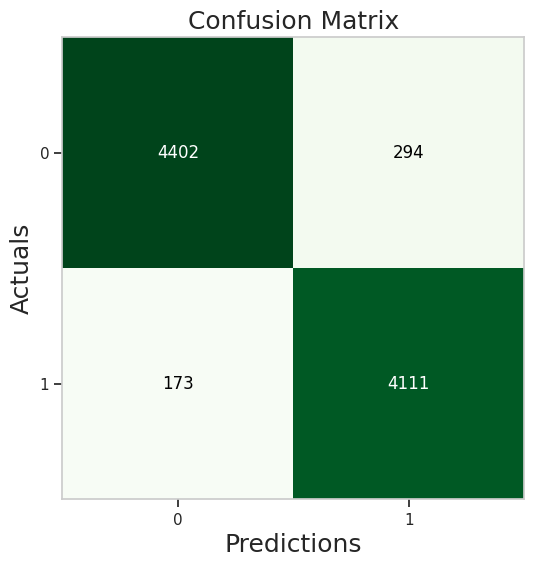

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
fig, ax = plot_confusion_matrix(
    conf_mat=conf_matrix,
    figsize=(6, 6),
    cmap=plt.cm.Greens
)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4696
           1       0.93      0.96      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



281/281 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step


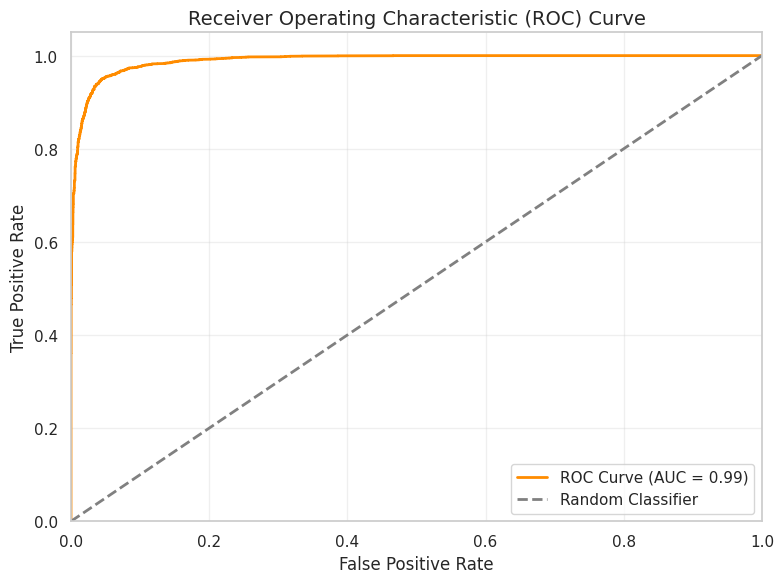

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_prob = model.predict({
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
})

# Flatten jika hasil prediksi bentuknya (n, 1)
if y_pred_prob.ndim > 1:
    y_pred_prob = y_pred_prob.ravel()

# Hitung FPR, TPR, dan thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step


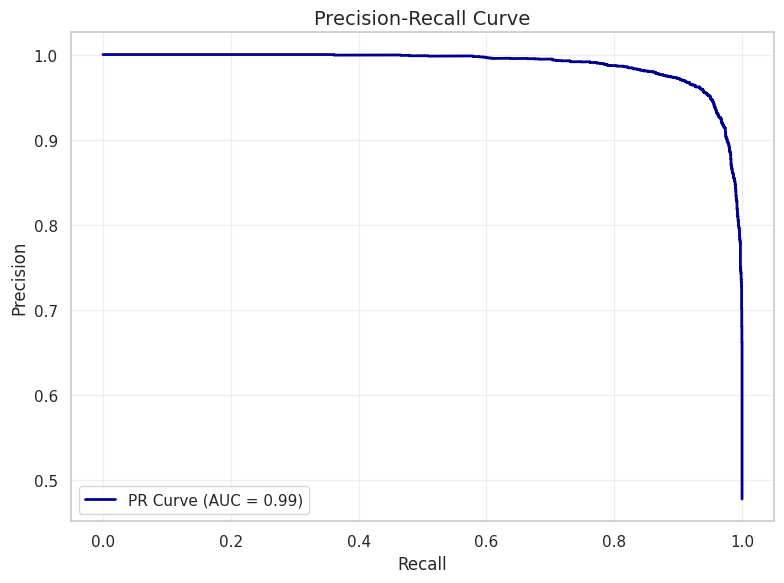

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities
y_pred_prob = model.predict({
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
})

# Flatten jika bentuknya (n, 1)
if y_pred_prob.ndim > 1:
    y_pred_prob = y_pred_prob.ravel()

# Hitung Precision, Recall, Threshold
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob)
pr_auc = auc(recall, precision)

# Plot PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc="lower left", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 55s 195ms/step


<Figure size 900x600 with 0 Axes>

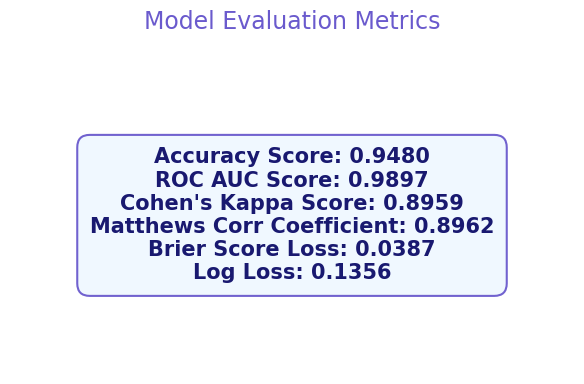

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    cohen_kappa_score,
    matthews_corrcoef,
    brier_score_loss,
    log_loss
)

# Prediksi probabilitas
y_pred_prob = model.predict({
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
})

# Pipihkan jika perlu
if y_pred_prob.ndim > 1:
    y_pred_prob = y_pred_prob.ravel()

# Konversi ke prediksi biner
y_pred = (y_pred_prob > 0.5).astype(int)

# Hitung metrik evaluasi
accuracy = accuracy_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)
cohen_kappa = cohen_kappa_score(Y_test, y_pred)
matthews_corr = matthews_corrcoef(Y_test, y_pred)
brier = brier_score_loss(Y_test, y_pred_prob)
logloss = log_loss(Y_test, y_pred_prob)

# Gabungkan semua metrik ke satu tampilan
plt.figure(figsize=(9, 6))
textstr = (
    f"Accuracy Score: {accuracy:.4f}\n"
    f"ROC AUC Score: {roc_auc:.4f}\n"
    f"Cohen's Kappa Score: {cohen_kappa:.4f}\n"
    f"Matthews Corr Coefficient: {matthews_corr:.4f}\n"
    f"Brier Score Loss: {brier:.4f}\n"
    f"Log Loss: {logloss:.4f}"
)

plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, textstr,
         fontsize=15,
         ha='center',
         va='center',
         color="midnightblue",
         fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.6",
                   facecolor='aliceblue',
                   edgecolor='slateblue',
                   linewidth=1.5,
                   alpha=0.95,
                   ))

plt.axis('off')
plt.title("Model Evaluation Metrics", fontsize=17, color='slateblue', pad=20)
plt.tight_layout()
plt.show()
